### Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
# api submodule gives access to the most commonly used 
# classes and functions directly.

2. Import Default dataset

In [84]:
default_df = pd.read_csv('Datasets/Default.csv')

In [57]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [58]:
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Exploratory Analysis

<Axes: xlabel='default'>

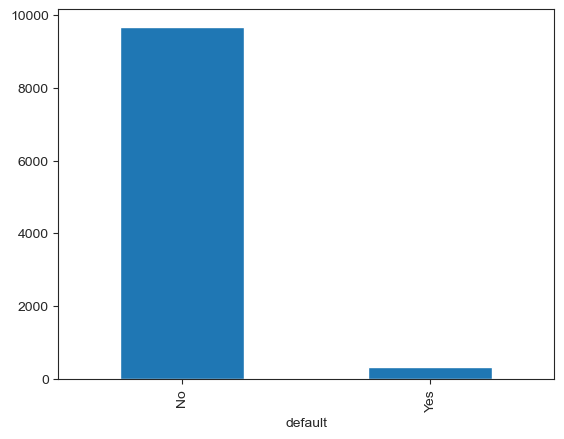

In [59]:
# Frequency of default in the dataset
default_df['default'].value_counts().plot(kind = 'bar')

<Axes: xlabel='student'>

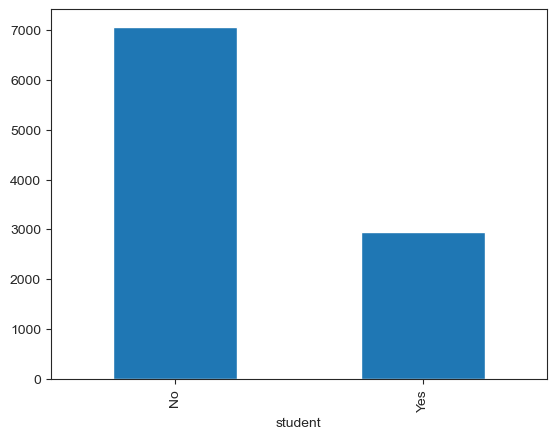

In [60]:
# Frequency of student
default_df['student'].value_counts().plot(kind = 'bar')

(array([  44.,  839., 1884., 1249., 1667., 1993., 1470.,  654.,  165.,
          35.]),
 array([  771.96772939,  8050.19430597, 15328.42088255, 22606.64745913,
        29884.87403571, 37163.10061229, 44441.32718887, 51719.55376545,
        58997.78034204, 66276.00691862, 73554.2334952 ]),
 <BarContainer object of 10 artists>)

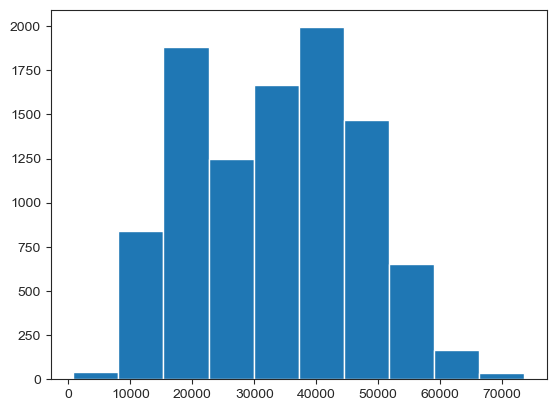

In [61]:
# Histogram of balance
import matplotlib.pyplot as plt
plt.hist(default_df['income'])

(array([1315., 1501., 1975., 2044., 1568.,  941.,  447.,  157.,   44.,
           8.]),
 array([   0.        ,  265.43225763,  530.86451526,  796.29677288,
        1061.72903051, 1327.16128814, 1592.59354577, 1858.0258034 ,
        2123.45806102, 2388.89031865, 2654.32257628]),
 <BarContainer object of 10 artists>)

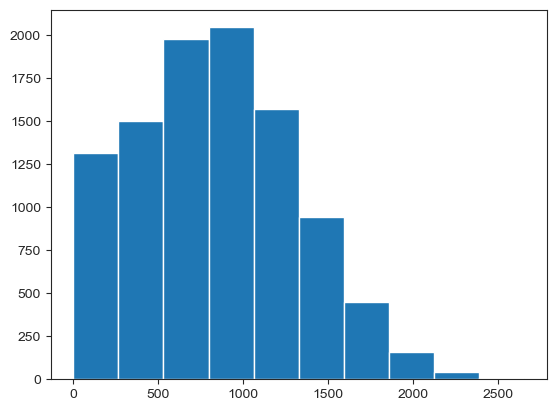

In [62]:
plt.hist(default_df['balance'])

/var/folders/w5/jf80gl6n4n93r9zzwvmjj1w40000gn/T/ipykernel_86331/3895774509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = default_df['default'], y = default_df['income'],


<Axes: xlabel='default', ylabel='income'>

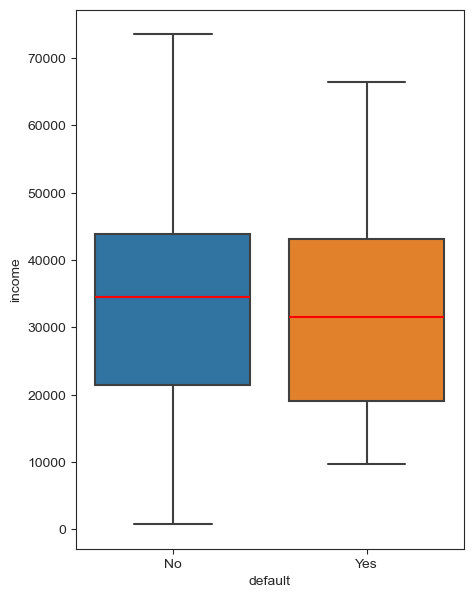

In [63]:
import seaborn as sns
# Style and size
sns.set_style('ticks')
plt.figure(figsize = (5,7))

sns.boxplot(x = default_df['default'], y = default_df['income'],
            palette=["#1f77b4", "#ff7f0e"],
            linewidth=1.5,
            medianprops=dict(color='red', linewidth= 1.5))

/var/folders/w5/jf80gl6n4n93r9zzwvmjj1w40000gn/T/ipykernel_86331/1955315349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = default_df['default'], y = default_df['balance'],


<Axes: xlabel='default', ylabel='balance'>

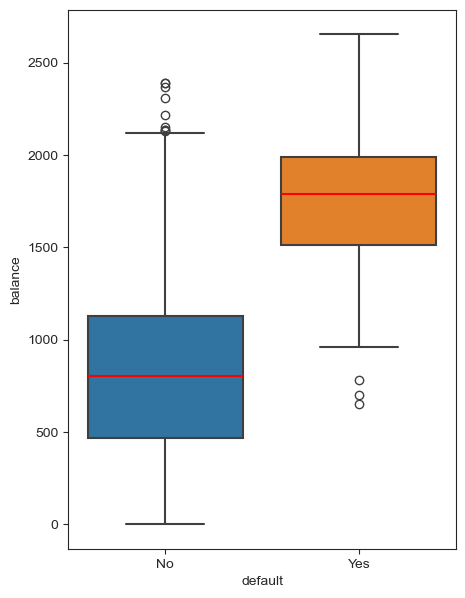

In [64]:
# Style and size
sns.set_style('ticks')
plt.figure(figsize = (5,7))

sns.boxplot(x = default_df['default'], y = default_df['balance'],
            palette=["#1f77b4", "#ff7f0e"],
            linewidth=1.5,
            medianprops=dict(color='red', linewidth= 1.5))

### Creating a scatterplot

<Axes: xlabel='balance', ylabel='income'>

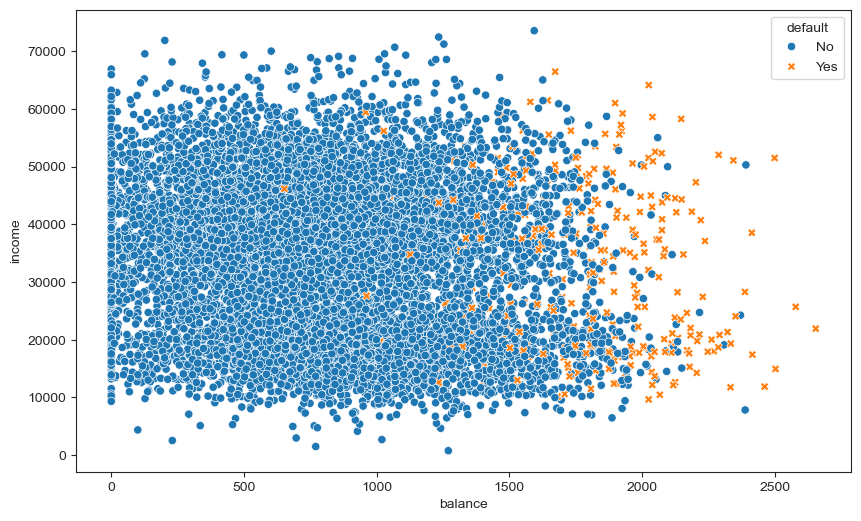

In [65]:
# Style and size
plt.figure(figsize = (10,6))

sns.scatterplot(x = default_df['balance'], y=default_df['income'],
                style= default_df['default'], hue=default_df['default'])

In [72]:
# Get dummy variables first
default_df_dummy = pd.get_dummies(default_df, columns=['default'], drop_first=True, dtype=int)

# Convert default from object to numberic
default_df['default'] = default_df['default'].map({'Yes': 1, 'No': 0})

In [74]:
print(default_df_dummy.dtypes)
print(default_df.dtypes)

student         object
balance        float64
income         float64
default_Yes      int64
dtype: object
default      int64
student     object
balance    float64
income     float64
dtype: object


In [78]:
# Fit a single variable model - balance
y = default_df['default']

features = default_df_dummy[['balance', 'income', 'default_Yes']]
features_x = sm.add_constant(features)

logit_model  = sm.Logit(y, features_x).fit()

logit_model.summary()

         Current function value: 0.000000
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                   1.000
Time:                        16:21:01   Log-Likelihood:            -2.0822e-06
converged:                      False   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -19.6712   2211.443     -0.009      0.993   -4354.020    4314.678
balance        -0.0005      1.679     -0.000      1.000      -3.291       3.290
income      -9.513e-05      0.069     -0.001      0.999      -0.136       0.136
default_Yes    44.5991   3079.862      0.014      0.988   -5991.819    6081.017
===============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [85]:
import patsy
y, X = patsy.dmatrices('default ~ balance + income + student',
                       data = default_df,
                       return_type = 'dataframe')

In [86]:
y.head()


,default[No],default[Yes]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [87]:
X.head()

,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [88]:
logit_model_2 = sm.Logit(y['default[Yes]'],
                         X[['Intercept', 'student[T.Yes]']])
logit_res_2 = logit_model_2.fit()
logit_res_2.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                0.004097
Time:                        16:26:05   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""